<a href="https://colab.research.google.com/github/TracyJi816/Waste-Management/blob/main/update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()


Saving Exports.xlsx to Exports (3).xlsx


In [20]:
import matplotlib.pyplot as pyplot

In [30]:
excel_data = pd.ExcelFile('Exports (3).xlsx')


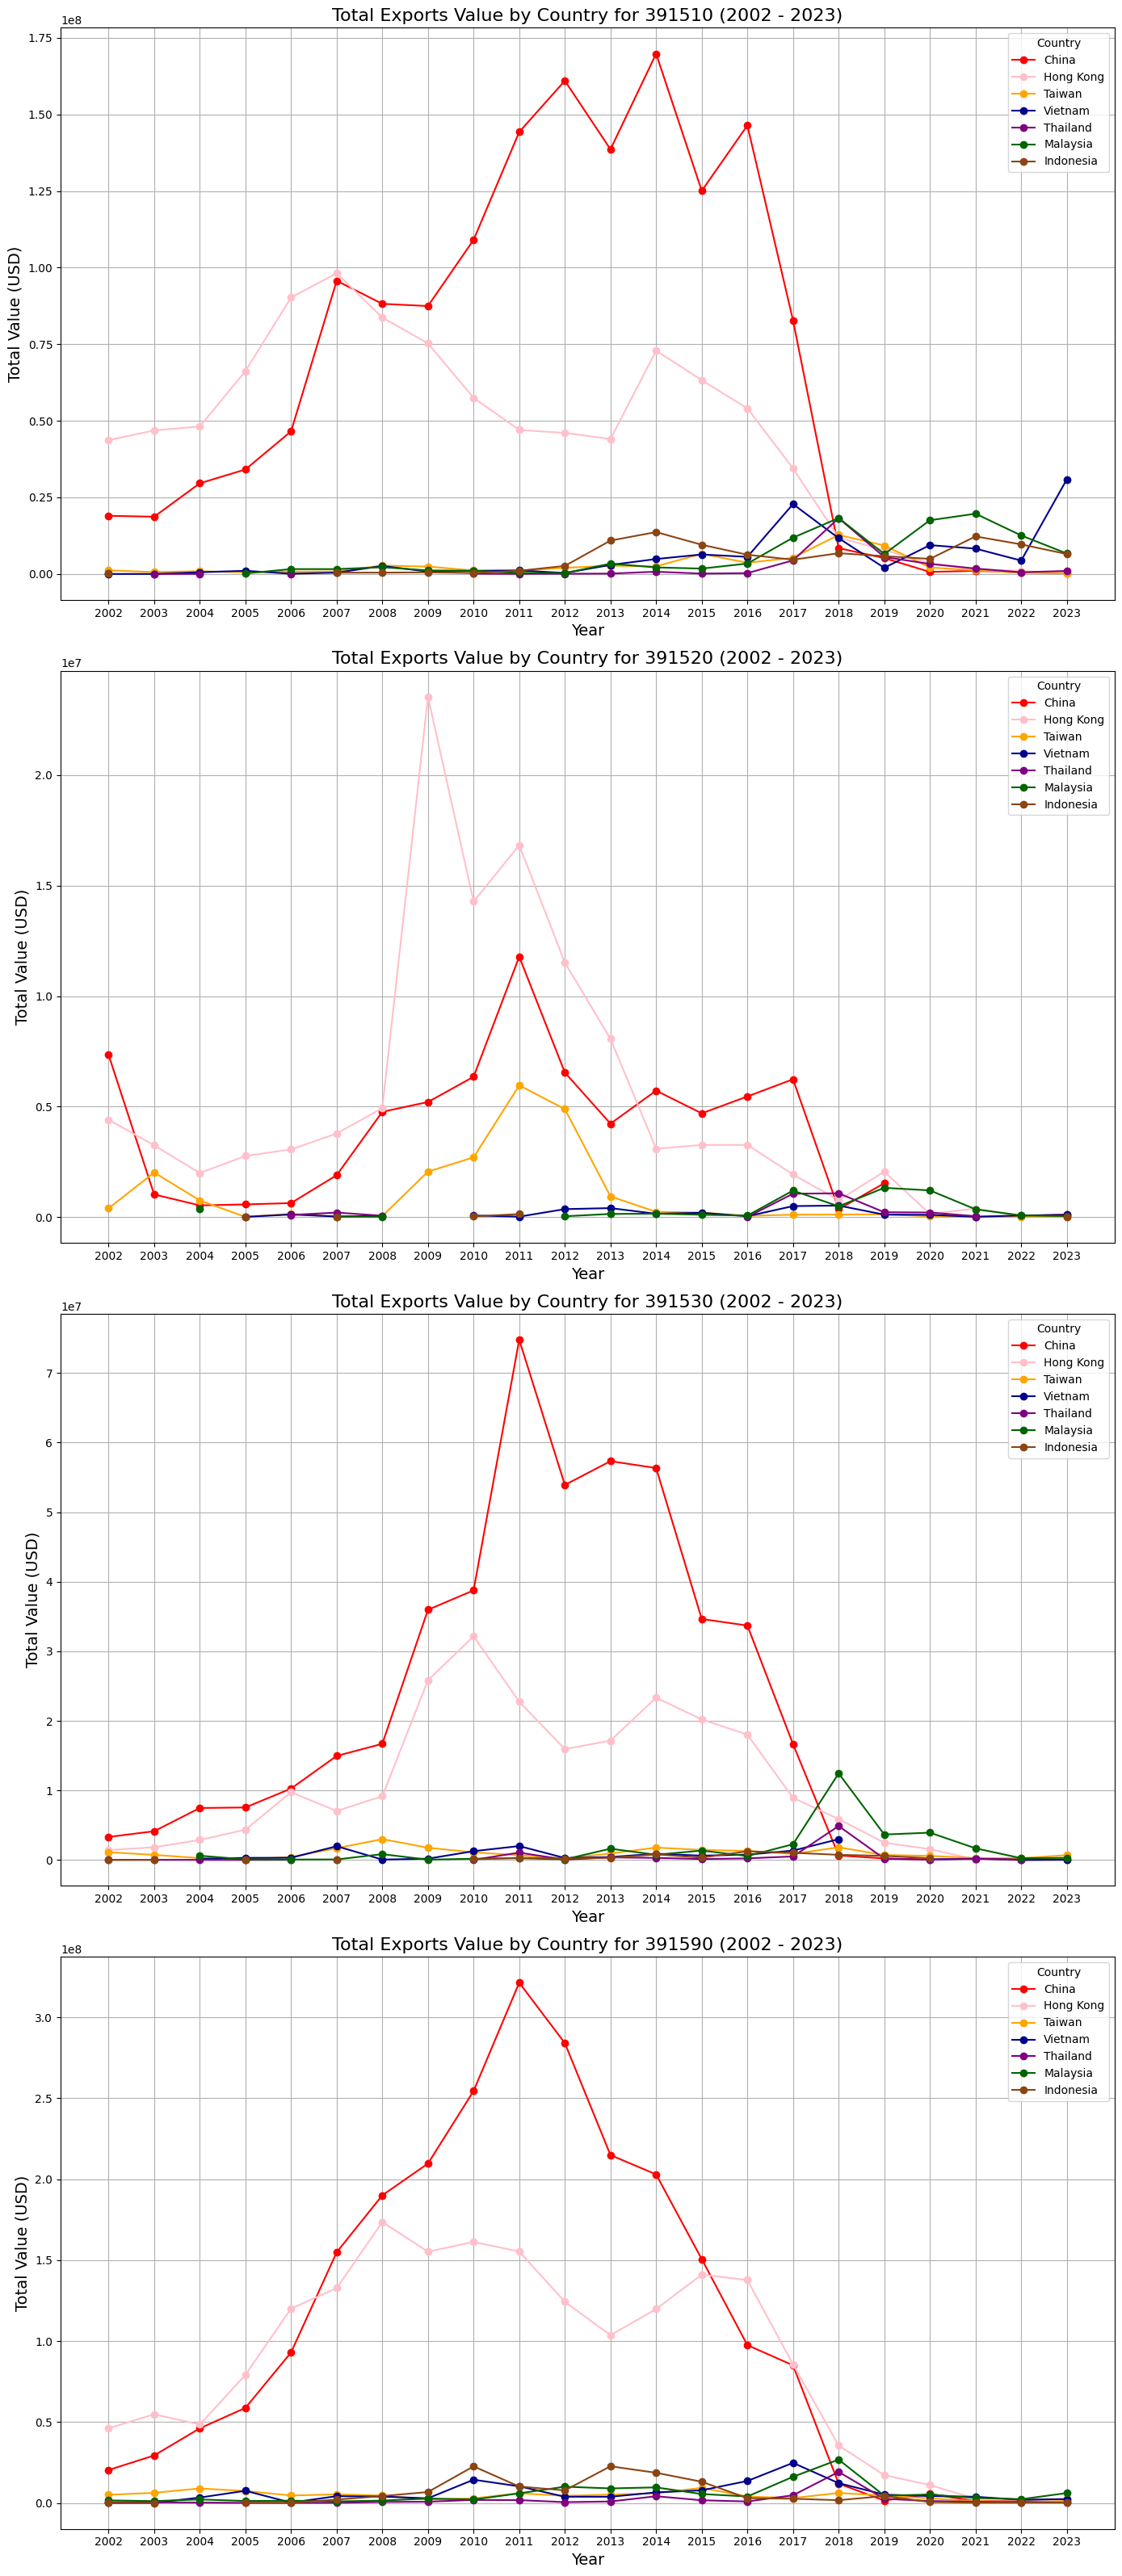

In [45]:
# Define the color mapping for each country
country_colors = {
    "China": "red",
    "Hong Kong": "pink",
    "Taiwan": "orange",
    "Vietnam": "darkblue",
    "Thailand": "purple",
    "Malaysia": "darkgreen",
    "Indonesia": "saddlebrown"
}

# Load data from each sheet
sheet_names = excel_data.sheet_names
sheets = {name: pd.read_excel(excel_data, sheet_name=name) for name in excel_data.sheet_names}

# Prepare a figure for the subplots
fig, axes = plt.subplots(nrows=len(excel_data.sheet_names), ncols=1, figsize=(14, 8 * len(excel_data.sheet_names)))

# Function to plot each country's data with designated colors
for i, (name, data) in enumerate(sheets.items()):
    for country in country_colors.keys():
        country_data = data[data['Country'] == country]
        axes[i].plot(country_data['Year'], country_data['Total Values'], label=country, marker='o', color=country_colors[country])
    axes[i].set_title(f'Total Exports Value by Country for {name} (2002 - 2023)', fontsize=16)
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].set_ylabel('Total Value (USD)', fontsize=14)
    axes[i].legend(title='Country')
    axes[i].grid(True)
    axes[i].set_xticks(country_data['Year'].unique())  # Ensure all years are labeled

plt.tight_layout()
plt.show()


In [48]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

# Assuming the file name is 'Exports.xlsx', adjust if your file name is different
file_name = list(uploaded.keys())[0]


Saving Exports.xlsx to Exports (5).xlsx


In [49]:
import matplotlib.pyplot as plt


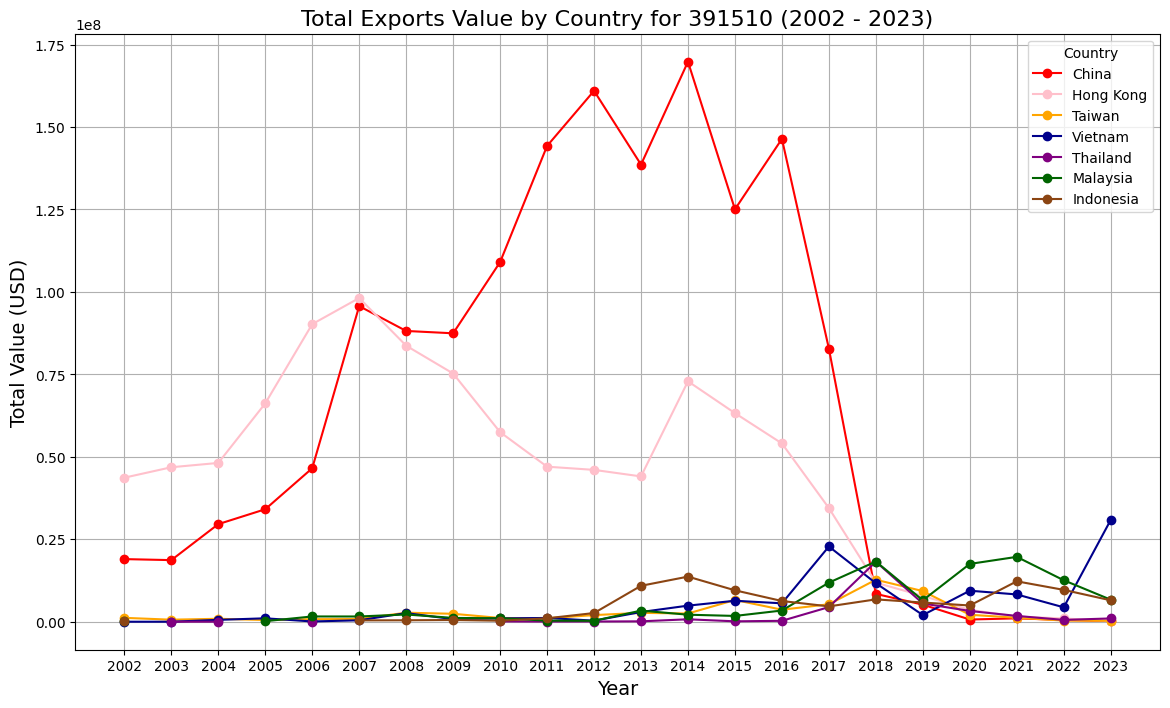

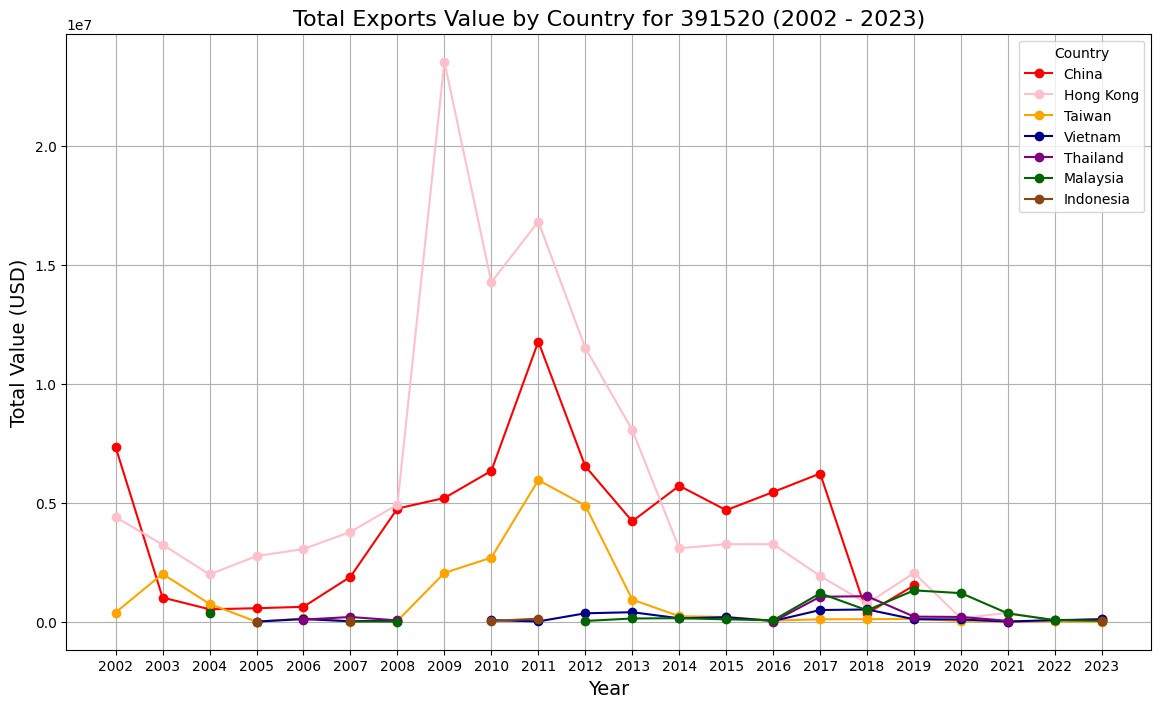

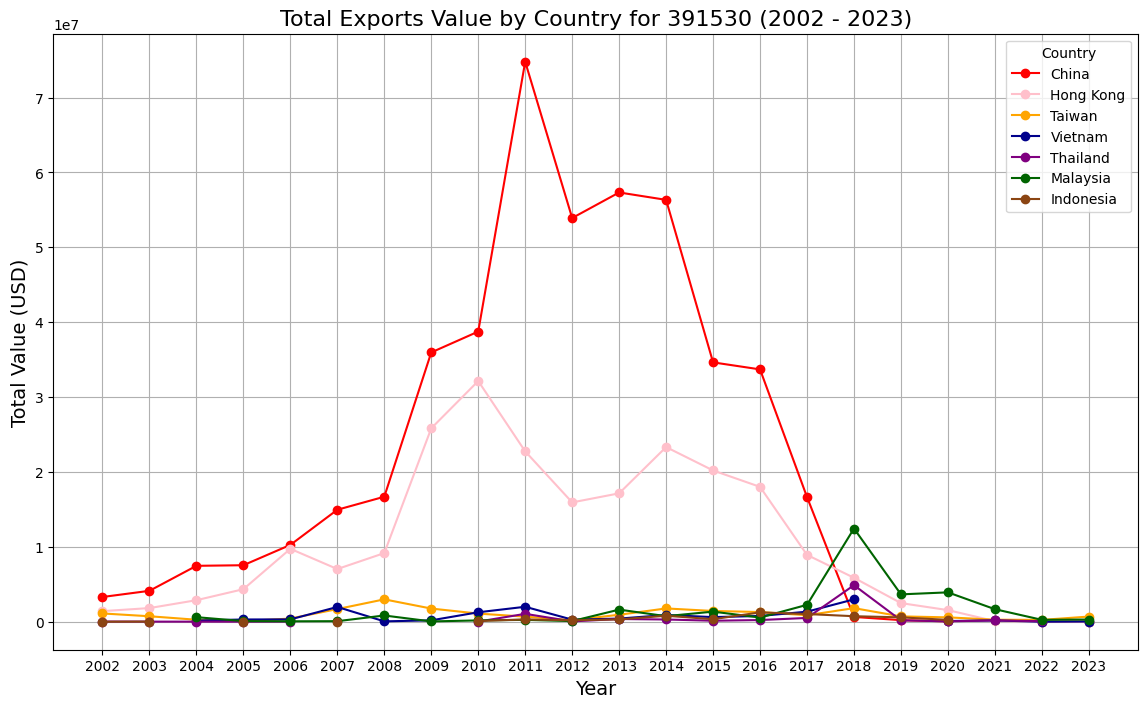

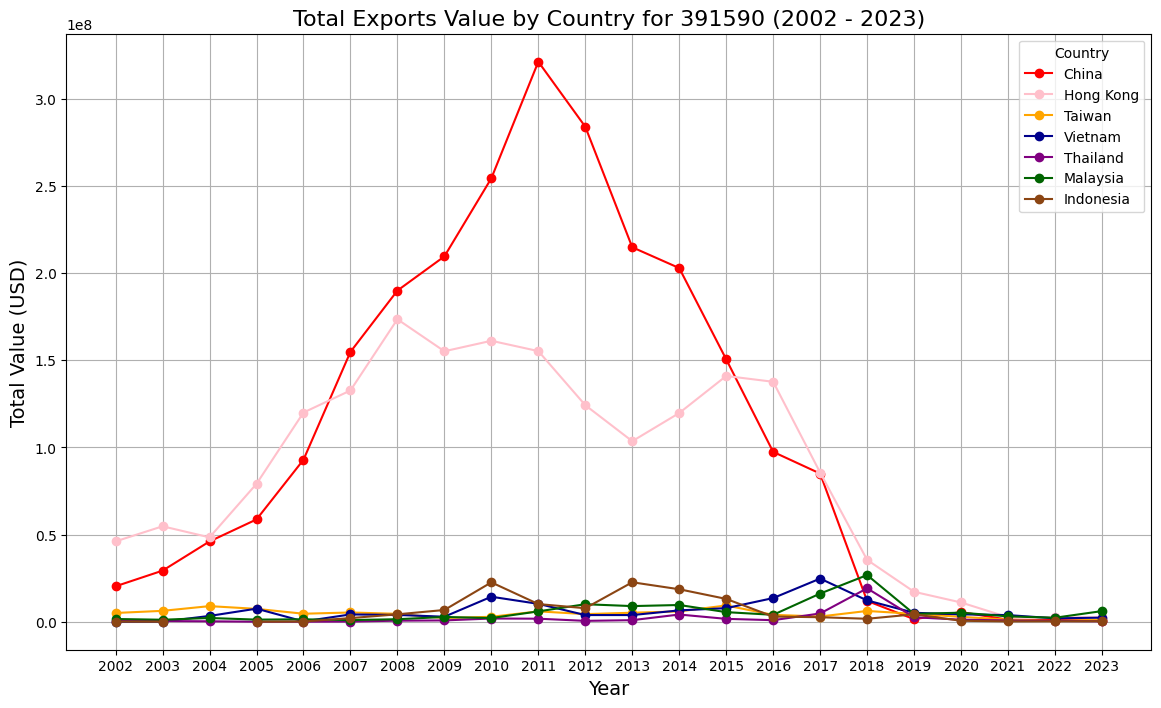

In [52]:
# Load the Excel file
excel_data = pd.ExcelFile(io.BytesIO(uploaded[file_name]))

# Define the color mapping for each country
country_colors = {
    "China": "red",
    "Hong Kong": "pink",
    "Taiwan": "orange",
    "Vietnam": "darkblue",
    "Thailand": "purple",
    "Malaysia": "darkgreen",
    "Indonesia": "saddlebrown"
}

# Define the countries of interest
countries = ["China", "Hong Kong", "Taiwan", "Vietnam", "Thailand", "Malaysia", "Indonesia"]

# Load data from each sheet and plot separately
for sheet_name in excel_data.sheet_names:
    data = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name=sheet_name)

    plt.figure(figsize=(14, 8))  # Size of the plot can be adjusted
    for country in countries:
        country_data = data[data['Country'] == country]
        plt.plot(country_data['Year'], country_data['Total Values'], label=country, marker='o', color=country_colors[country])

    plt.title(f'Total Exports Value by Country for {sheet_name} (2002 - 2023)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Value (USD)', fontsize=14)
    plt.legend(title='Country')
    plt.grid(True)
    plt.xticks(country_data['Year'].unique())  # Ensure all years are labeled
    plt.savefig(f"{sheet_name}_exports_chart.png")
    plt.show()


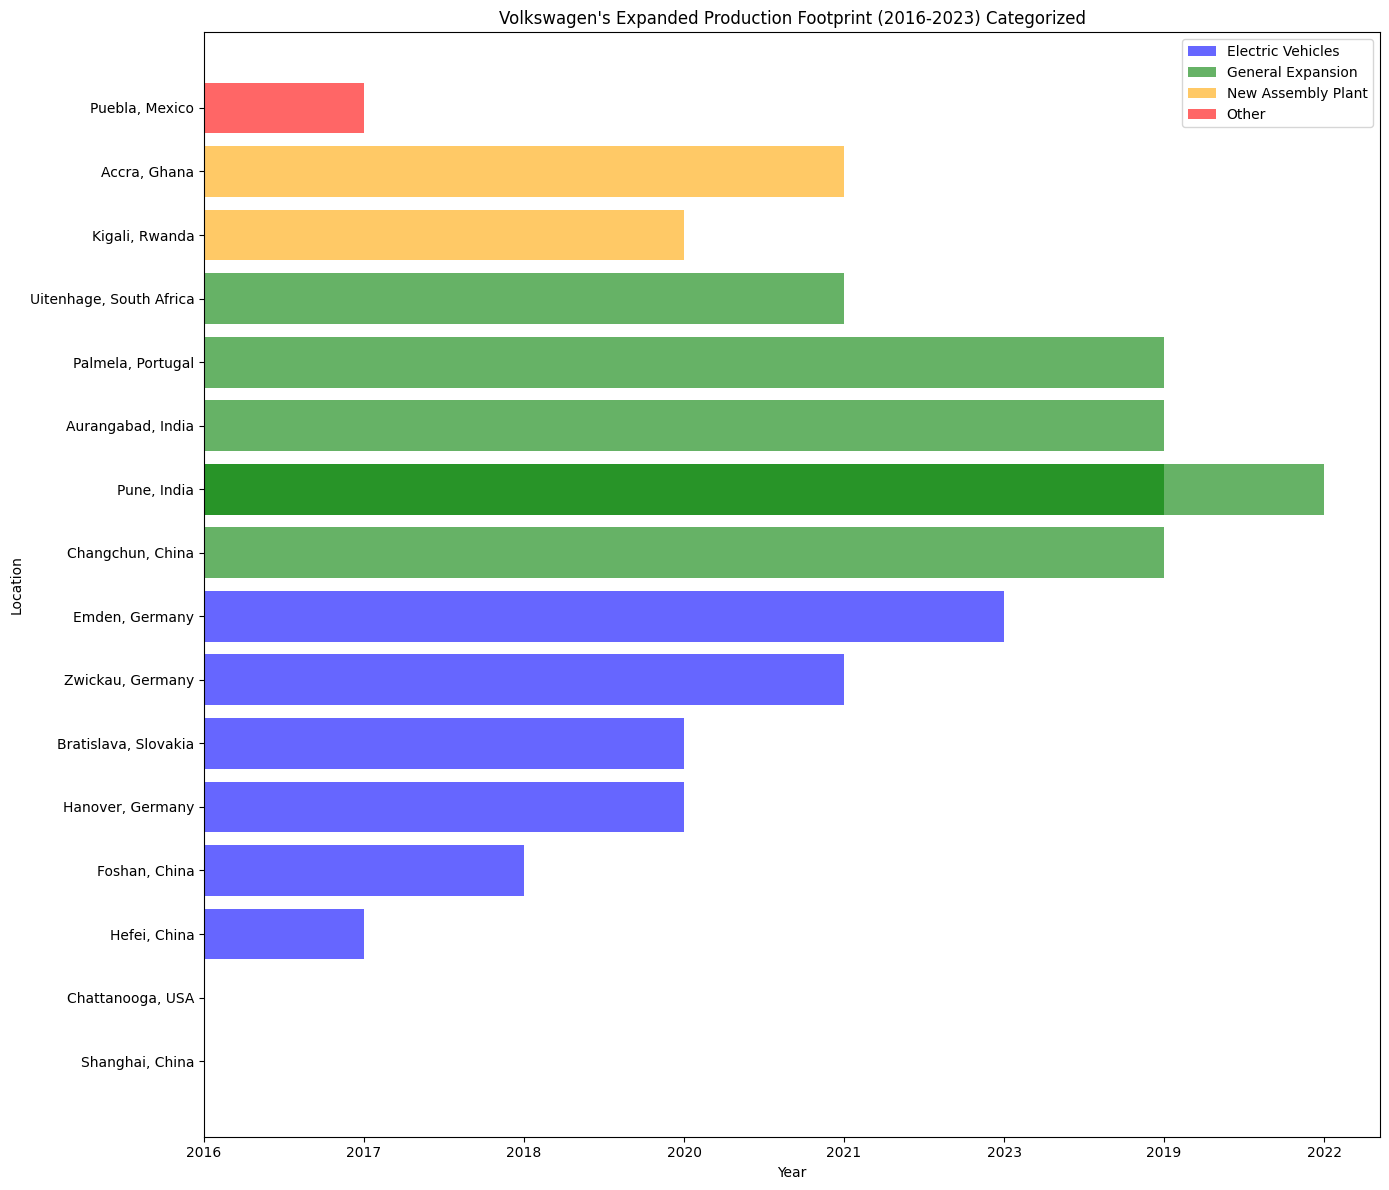

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for the given context
context_data = {
    "Year": [2016, 2017, 2018, 2019, 2019, 2019, 2022, 2020, 2021, 2021, 2023, 2019, 2020, 2020, 2021, 2016, 2017],
    "Location": ["Shanghai, China", "Hefei, China", "Foshan, China", "Changchun, China", "Pune, India", "Aurangabad, India",
                 "Pune, India", "Kigali, Rwanda", "Uitenhage, South Africa", "Accra, Ghana", "Emden, Germany",
                 "Palmela, Portugal", "Hanover, Germany", "Bratislava, Slovakia", "Zwickau, Germany", "Chattanooga, USA", "Puebla, Mexico"],
    "Focus": ["Expansion of SAIC Volkswagen plant for electric vehicles",
              "New joint venture plant focusing on electric vehicles",
              "Expansion for electric vehicle production (ID. family)",
              "Expansion for Volkswagen and Audi vehicles",
              "Expansion of existing plant for Skoda and Volkswagen models",
              "Expansion of existing plant for Skoda and Volkswagen models",
              "Further expansion for Skoda and Volkswagen models",
              "New assembly plant for local assembly and mobility services",
              "Expansion to increase production capacity for Polo and T-Cross SUV",
              "New assembly plant for the local market",
              "Conversion into a dedicated electric vehicle production plant",
              "Expansion to increase production capacity for various models",
              "Expansion for electric vehicle production (ID. BUZZ)",
              "Expansion for electric vehicle production",
              "Expansion for electric vehicle production (ID. family)",
              "Expansion for electric vehicle production (ID.4)",
              "Expansion for production of various models including Jetta"]
}

context_df = pd.DataFrame(context_data)
context_df = context_df.sort_values(by="Year").reset_index(drop=True)

# Categorizing the focuses
categories = {
    "Electric Vehicles": [
        "Expansion of SAIC Volkswagen plant for electric vehicles",
        "New joint venture plant focusing on electric vehicles",
        "Expansion for electric vehicle production (ID. family)",
        "Conversion into a dedicated electric vehicle production plant",
        "Expansion for electric vehicle production (ID.4)",
        "Expansion for electric vehicle production (ID. BUZZ)",
        "Expansion for electric vehicle production",
        "Expansion for electric vehicle production (ID. family)"
    ],
    "General Expansion": [
        "Expansion for Volkswagen and Audi vehicles",
        "Expansion of existing plant for Skoda and Volkswagen models",
        "Further expansion for Skoda and Volkswagen models",
        "Expansion to increase production capacity for various models",
        "Expansion to increase production capacity for Polo and T-Cross SUV"
    ],
    "New Assembly Plant": [
        "New assembly plant for local assembly and mobility services",
        "New assembly plant for the local market"
    ]
}

# Mapping categories to the data
context_df["Category"] = context_df["Focus"].apply(lambda x: next((k for k, v in categories.items() if x in v), "Other"))

# Plotting the categorized data
fig, ax = plt.subplots(figsize=(14, 12))

# Bar chart with different colors for categories
colors = {"Electric Vehicles": "blue", "General Expansion": "green", "New Assembly Plant": "orange", "Other": "red"}
for category in colors.keys():
    subset = context_df[context_df["Category"] == category]
    bars = ax.barh(subset["Location"], subset["Year"].astype(str), color=colors[category], label=category, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Location')
ax.set_title("Volkswagen's Expanded Production Footprint (2016-2023) Categorized")
ax.legend()

plt.tight_layout()
plt.show()


In [53]:
# Download the files
for sheet_name in excel_data.sheet_names:
    files.download(f"{sheet_name}_exports_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>